# Data visualization for extracted features

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def change_difficulty(num):
  match num:
    case 1:
      return 1
    case 1.5:
      return 1
    case 2:
      return 2
    case 2.5:
      return 2
    case 3:
      return 3
    case 3.5:
      return 4
    case 4:
      return 4
    case 4.5:
      return 5
    case 5:
      return 5
    
# Keep only numeric columns
df = pd.read_csv('merged.csv')
df = df.drop(columns=['file'])
df['difficulty'] = df['difficulty'].apply(change_difficulty)

## Get information about the data

In [6]:
print(df.describe())

       difficulty  average_tempo  average_bpm    note_count    tick_count  \
count  212.000000   2.120000e+02   212.000000    212.000000  2.120000e+02   
mean     2.853774   5.817316e+05   116.136997   5408.882075  2.704661e+05   
std      1.377660   2.507059e+05    35.126231   5891.546660  3.226727e+05   
min      1.000000   2.418231e+05    31.000113    220.000000  1.680000e+03   
25%      2.000000   4.581922e+05    99.693846   1723.000000  5.116800e+04   
50%      3.000000   5.000000e+05   120.000000   3966.000000  1.342800e+05   
75%      4.000000   6.018597e+05   130.949406   7360.000000  3.402000e+05   
max      5.000000   1.935477e+06   248.115244  66008.000000  1.593600e+06   

       note_density  tempo_deviation  unique_note_count  total_duration  \
count    212.000000       212.000000         212.000000    2.120000e+02   
mean       0.044595    101708.034854          53.476415    1.105609e+06   
std        0.053805    145599.809170          13.450432    1.756872e+06   
min   

Get correlation

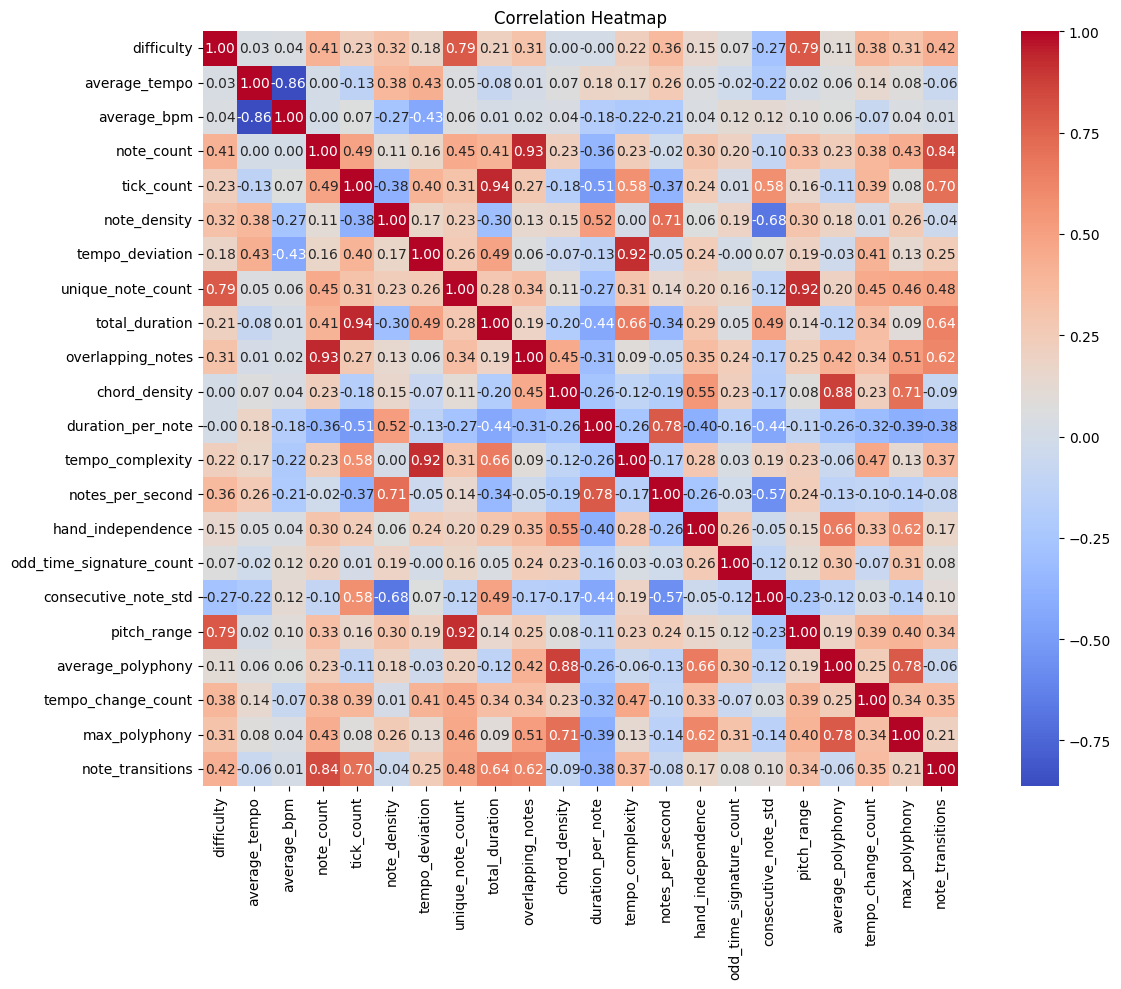

In [11]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##  Get distribution of difficulty

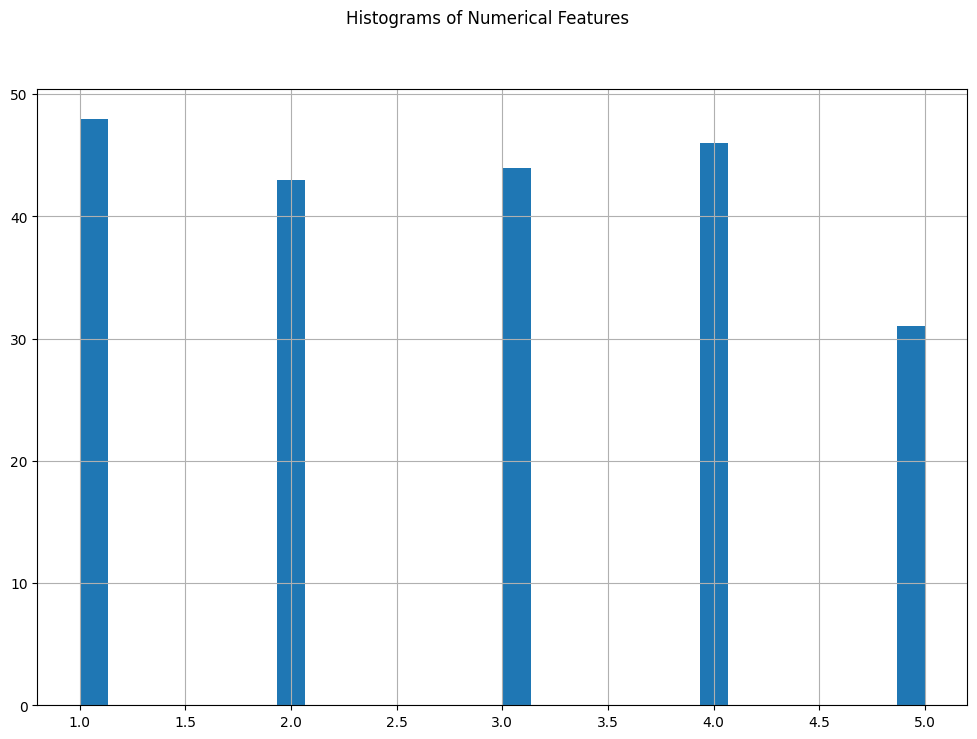

In [8]:
df['difficulty'].hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

## Graph  features with highest correlation against difficulty

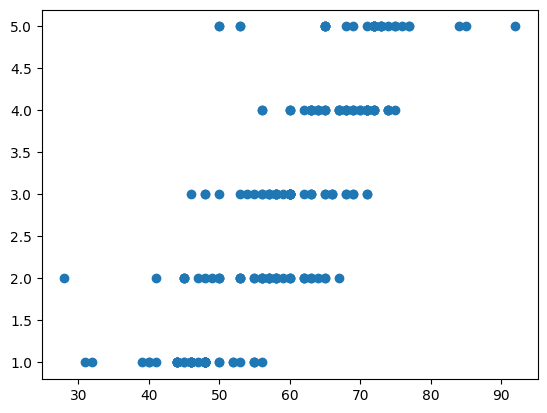

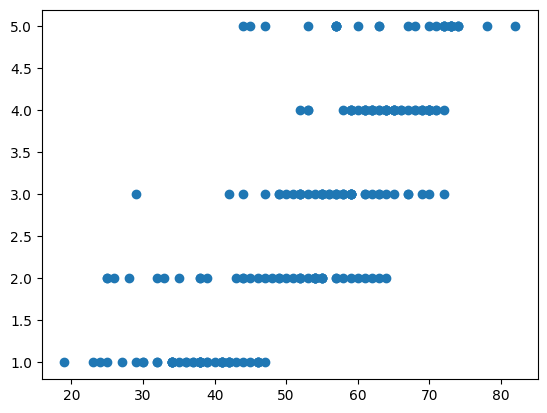

In [12]:
fig,ax = plt.subplots()
ax.scatter(y = df['difficulty'], x = df['pitch_range'])
plt.show()

fig,ax  = plt.subplots()
ax.scatter(y = df['difficulty'], x = df['unique_note_count'])
plt.show()

### Deleting outliers

## Graphing all data against difficulty

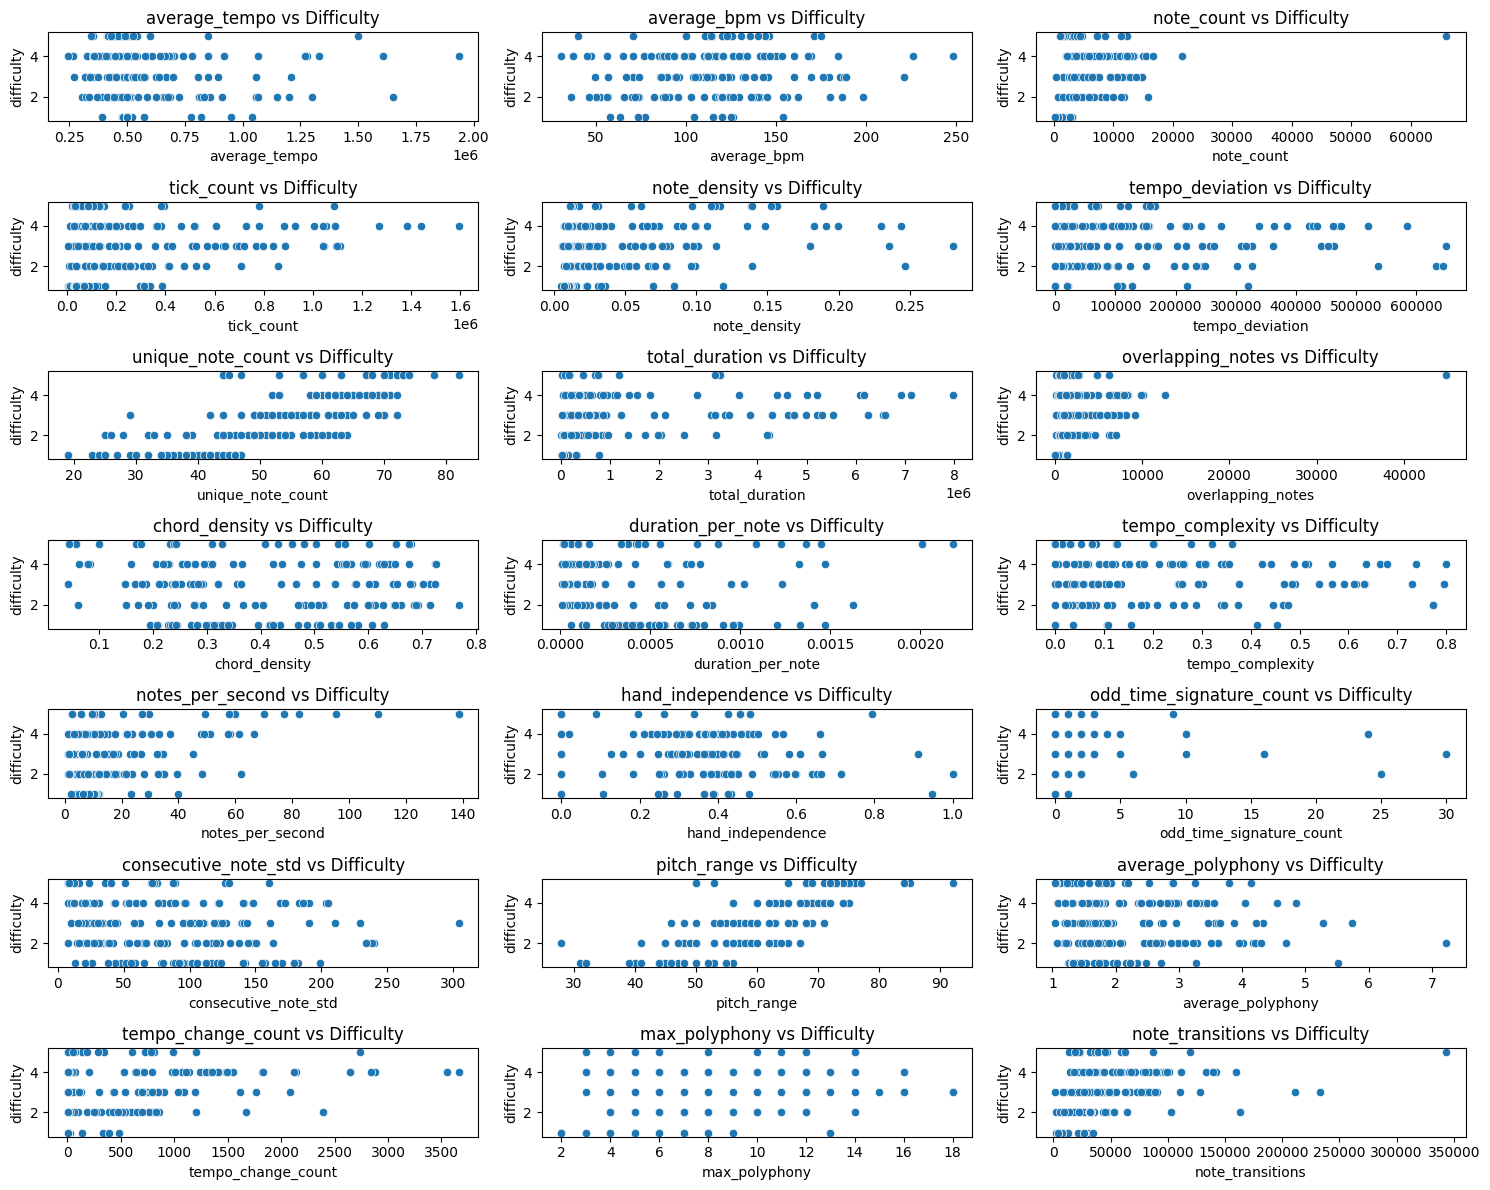

In [9]:
features = df.drop(columns=['difficulty']).columns

# Create subplots
num_features = len(features)
cols = 3
rows = (num_features + cols - 1) // cols

plt.figure(figsize=(15, 12))
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(data=df, x=feature, y='difficulty')
    plt.title(f'{feature} vs Difficulty')
    plt.tight_layout()

plt.show()